<a href="https://colab.research.google.com/github/Gkimatov/CS-460/blob/main/460_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from datetime import datetime as dt
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
#this command will download the original file
!gdown --id 1es5kvNIhxMnw0nSFrWAZskxiVECzkvkG

Downloading...
From: https://drive.google.com/uc?id=1es5kvNIhxMnw0nSFrWAZskxiVECzkvkG
To: /content/NYC_data_clean.csv
100% 278M/278M [00:01<00:00, 177MB/s]


In [2]:
 #this command will download the unemployment data file in NYC
 !gdown --id 19enx0upJXRlvQYCPzg5zqgG-AfKrgfQY

Downloading...
From: https://drive.google.com/uc?id=19enx0upJXRlvQYCPzg5zqgG-AfKrgfQY
To: /content/NYC_Unemployment.csv
100% 3.27k/3.27k [00:00<00:00, 2.24MB/s]


In [4]:
# this command will download the GDP data for the 5 counties in NYC
!gdown --id 1Jvoy5Bcz2a44F1lO0ADm4yzKCCWZxqIj

Downloading...
From: https://drive.google.com/uc?id=1Jvoy5Bcz2a44F1lO0ADm4yzKCCWZxqIj
To: /content/gdp.csv
100% 1.88k/1.88k [00:00<00:00, 4.33MB/s]


In [6]:
#Importing the data

df_un_clean=pd.read_csv('NYC_Unemployment.csv')
df_gdp_clean=pd.read_csv('gdp.csv')
df_clean=pd.read_csv('NYC_data_clean.csv')

# Linear Regression by crime rate per year

In [7]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
arrest_year = pd.to_datetime(df_clean['arrest_date']).dt.year

# make a dataframe to have crime rate per year (# of arrests / # NYC population) * 100000)
nyc_pop = 8175000 # according to 2010 census
per_100k = 100000

yearly_crime_rate = (((arrest_year.value_counts(ascending=True))/nyc_pop)*per_100k).rename_axis('arrest_year').reset_index(name='arrest_count')
yearly_crime_rate

,arrest_year,arrest_count
0,2019,1980.159021
1,2018,2261.284404
2,2017,2757.418960
3,2016,3067.217125
4,2015,3172.269113
5,2006,3521.174312
6,2013,3648.990826
7,2012,3714.948012
8,2014,3720.795107
9,2007,3837.785933


In [ ]:
# get feature & target from dataframe
feature = yearly_crime_rate[['arrest_year']]
target = yearly_crime_rate[['arrest_count']]

# split data into training & test data
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.25)

Coefficients:  [[-130.10793492]]
Mean squared error: 33443.4335989199
Coefficient of determination: 0.8296068736403752
Score gotten from cross-validation: 0.8296068736403752


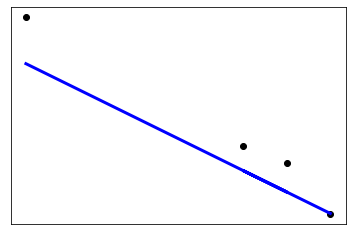

In [ ]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Coefficients: ', reg.coef_)
print('Mean squared error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: {}'.format(r2_score(y_test, y_pred)))
print("Score gotten from cross-validation:",reg.score(X_test,y_test))

plt.scatter(X_test,y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Impact of Economic Factors on Crime

# GDP

In [9]:
#Converting the datatype from object to datetime
df_clean['arrest_date'] = pd.to_datetime(df_clean['arrest_date'])

#Extracting the year and month
df_clean['arrest_date'] = df_clean['arrest_date'].dt.strftime('%Y')

#Counting the arrests based on individual month and year
annual_arrests = df_clean['arrest_date'].value_counts().rename_axis('arrest_year').reset_index(name='arrest_count')

#Sorting the values from 2006-01 to 2019-12
annual_arrests=annual_arrests.sort_values(by='arrest_year',ascending=True)

#Setting up the target values for the model
Y=pd.DataFrame(annual_arrests['arrest_count'])
Y['arrest_count']=Y['arrest_count'].tail(14)
Y.reset_index(drop=True,inplace=True)

#Dropping the arrest_count column from annual_arrests dataframe because we dont need that
#in the features
annual_arrests.drop(['arrest_count'],inplace=True,axis=1)

#Adding an extra column in the annual_arrests dataframe
annual_arrests['gdp_perc_change_from_prev_year']=df_gdp_clean['gdp_perc_change_from_prev_year']

#Selecting the features
#Our features are Arrest year month and Unemployment Rate
X=pd.DataFrame(annual_arrests)
X.reset_index(drop=True,inplace=True)

#Taking only year
X['arrest_year']=annual_arrests['arrest_year']
X['arrest_year']=pd.to_datetime(X['arrest_year'])
X['arrest_year']=X['arrest_year'].dt.year
X['arrest_year']=X['arrest_year'].tail(14)

#Filling up the null values with the last value
X['gdp_perc_change_from_prev_year']=X['gdp_perc_change_from_prev_year'].fillna(method ='bfill')
X['gdp_perc_change_from_prev_year']=X['gdp_perc_change_from_prev_year'].tail(14)

# The following linear regression model calculates the future crime rate based on year and annual percent change of GDP in NYC.

In [12]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Creating a linear Regression Model
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)
model.fit(X_train, Y_train)
prediction= model.predict(X_test)
Acc=model.score(X_test, Y_test)
print ("Accuracy={0:.2f}".format(Acc))

Accuracy=0.67


In [13]:
print('In 2045, if the average annual GDP percent change in NYC is +40%, then the regression predicts there will be',math.ceil(abs(model.predict([[2045,0.40]]))),'arrests that year')

print('In 2045, if the average annual GDP percent change in NYC is +1%, then the regression predicts there will be',math.ceil(abs(model.predict([[2045,0.01]]))),'arrests that year')

In 2045, if the average annual GDP percent change in NYC is +40%, then the regression predicts there will be 80810 arrests that year
In 2045, if the average annual GDP percent change in NYC is +1%, then the regression predicts there will be 85228 arrests that year


# The model predicts that as average annual GDP percent change in NYC increases, arrest count will decrease.

Text(0, 0.5, 'prediction')

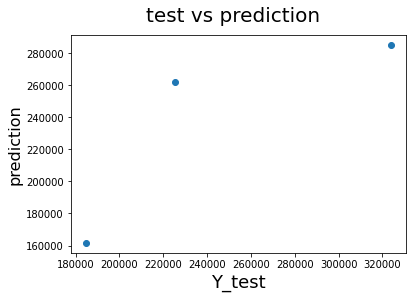

In [14]:
fig = plt.figure()
plt.scatter(Y_test,prediction)
fig.suptitle('test vs prediction', fontsize=20)            
plt.xlabel('Y_test', fontsize=18)                          
plt.ylabel('prediction', fontsize=16)  

# Unemployment

In [ ]:
#Mapping the data values from object type to integer
df_un_clean['Month'] = df_un_clean['Month'].map({ 'January': 1,
                                                   'February': 2,
                                                   'March': 3,
                                                   'April': 4,
                                                    'May':5,
                                                     'June':6,
                                                     'July':7,
                                                     'August':8,
                                                     'September':9,
                                                     'October':10,
                                                     'November':11,
                                                     'December':12})
#Dropping the first 12 rows because those are values from 2005
#But we don't have arrest data from 2005 in our main dataset

df_un_clean=df_un_clean.drop(range(0,12))

#Converting the datatype from object to datetime
df_clean['arrest_date'] = pd.to_datetime(df_clean['arrest_date'])

#Extracting the year and month
df_clean['arrest_date'] = df_clean['arrest_date'].dt.strftime('%Y-%m')

#Counting the arrests based on individual month and year
daily_arrests_month = df_clean['arrest_date'].value_counts().rename_axis('arrest_month').reset_index(name='arrest_count')

#Sorting the values from 2006-01 to 2019-12
daily_arrests_month=daily_arrests_month.sort_values(by='arrest_month',ascending=True)

#Setting up the target values for the model
Y=pd.DataFrame(daily_arrests_month['arrest_count'])
Y.reset_index(drop=True,inplace=True)

#Dropping the arrest_count column from daily_arrests_month dataframe because we dont need that
#in the features
daily_arrests_month.drop(['arrest_count'],inplace=True,axis=1)

#Adding an extra column in the daily_arrests_month dataframe
daily_arrests_month['Rate']=df_un_clean['Rate']

#Selecting the features
#Our features are Arrest year month and Unemployment Rate
X=pd.DataFrame(daily_arrests_month)
X.reset_index(drop=True,inplace=True)

#Taking only year
X['arrest_month']=daily_arrests_month['arrest_month']
X['arrest_month']=pd.to_datetime(X['arrest_month'])
X['arrest_month']=X['arrest_month'].dt.year

#Filling up the null values with the last value
X['Rate']=X['Rate'].fillna(method ='bfill')

# Below the LinearRegression model will calculate the future crime rate based on year and unemployment rate.

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Creating a linear Regression Model
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)
model.fit(X_train, Y_train)
prediction= model.predict(X_test)
Acc=model.score(X_test, Y_test)
print ("Accuracy={0:.2f}".format(Acc))

Accuracy=0.62


In [ ]:
def Linear_prediction(year,rate):
    import math
    pred=(math.ceil(abs(model.predict([[year,rate]]))))*12
    st='In the year of '+str(year)+ ' if the average unemployment rate of NYC is '+str(rate*100)+'% then there will be '+str(pred)+' crime'
    return st
print(Linear_prediction(2045,.01))
print(Linear_prediction(2045,.88))

In the year of 2045 if the average unemployment rate of NYC is 1.0% then there will be 55668 crime
In the year of 2045 if the average unemployment rate of NYC is 88.0% then there will be 154920 crime


## So based on our model prediction, the crime rate will rise, if the unemployment rate rises.

Text(0, 0.5, 'prediction')

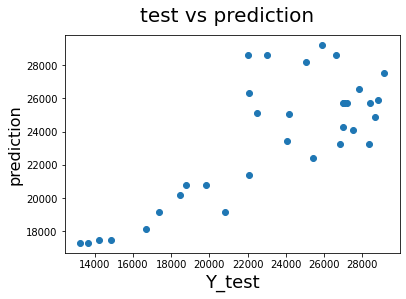

In [ ]:
fig = plt.figure()
plt.scatter(Y_test,prediction)
fig.suptitle('test vs prediction', fontsize=20)            
plt.xlabel('Y_test', fontsize=18)                          
plt.ylabel('prediction', fontsize=16)   